In [96]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator


In [97]:
# Initialise data
cols = ["Date", "Adj_Close"]
df = pd.read_csv("MSFT.csv").drop(["Open","High","Low","Volume", "Close"], axis = 1)
df.columns = cols
print(df.head())

         Date  Adj_Close
0  1986-03-13   0.060055
1  1986-03-14   0.062199
2  1986-03-17   0.063272
3  1986-03-18   0.061663
4  1986-03-19   0.060591


Shape of data frame: (9651, 2)


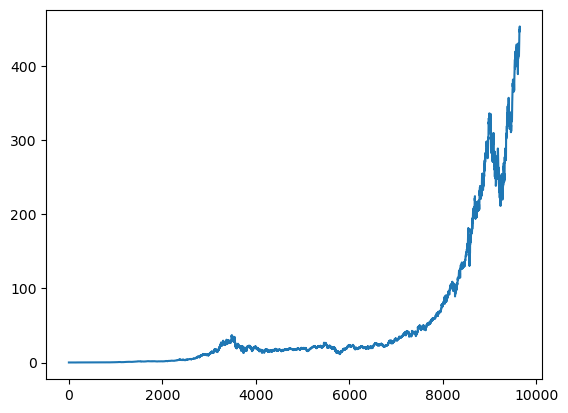

In [98]:
# Test Data
plt.plot(df["Adj_Close"])
print("Shape of data frame:", df.shape)

In [99]:
# Randomise Seed
tf.random.set_seed(7)
# Initialise training and test sets
prices = df["Adj_Close"].values

scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices.reshape(-1,1))

train_size = int(len(prices) * 0.8)
train = prices[:train_size]
test = prices[train_size:]
print(train_size)

7720


In [100]:
#Create X and Y datasets for train and test

look_back = 15
train_set = TimeseriesGenerator(train, train, length=look_back, batch_size=20)     
test_set = TimeseriesGenerator(test, test, length=look_back, batch_size=1)



In [102]:
# Define Model

nn_model=Sequential()
nn_model.add(LSTM(100,activation='relu',input_shape=(look_back,1),return_sequences=True))
nn_model.add(LSTM(50,activation='relu',return_sequences=True))
nn_model.add(LSTM(10,activation='relu'))
nn_model.add(Dense(1))

nn_model.build()
print(nn_model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 15, 100)           40800     
                                                                 
 lstm_16 (LSTM)              (None, 15, 50)            30200     
                                                                 
 lstm_17 (LSTM)              (None, 10)                2440      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 73,451
Trainable params: 73,451
Non-trainable params: 0
_________________________________________________________________
None


In [103]:
#train
nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit_generator(train_set, epochs=50, verbose=1)

Epoch 1/50


/var/folders/kf/vpb_njpd2kq855ltgz0plhfh0000gn/T/ipykernel_32014/1291677982.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  nn_model.fit_generator(train_set, epochs=50, verbose=1)
2024-07-01 18:37:21.407479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


386/386 [==============================] - 5s 8ms/step - loss: 2.6322e-04
Epoch 2/50
386/386 [==============================] - 3s 8ms/step - loss: 3.9036e-05
Epoch 3/50
386/386 [==============================] - 3s 9ms/step - loss: 1.1988e-05
Epoch 4/50
386/386 [==============================] - 3s 8ms/step - loss: 1.3805e-05
Epoch 5/50
386/386 [==============================] - 3s 9ms/step - loss: 1.6839e-05
Epoch 6/50
386/386 [==============================] - 3s 8ms/step - loss: 1.6515e-05
Epoch 7/50
386/386 [==============================] - 3s 8ms/step - loss: 1.6740e-05
Epoch 8/50
386/386 [==============================] - 3s 8ms/step - loss: 2.2706e-05
Epoch 9/50
386/386 [==============================] - 3s 9ms/step - loss: 9.9823e-06
Epoch 10/50
386/386 [==============================] - 3s 8ms/step - loss: 1.9970e-05
Epoch 11/50
386/386 [==============================] - 3s 8ms/step - loss: 1.1351e-05
Epoch 12/50
386/386 [==============================] - 3s 9ms/step - loss:

In [94]:
train_pred = nn_model.predict(train)
test_pred = nn_model.predict(test)

# invert predictions
#train_pred = scaler.inverse_transform(train_pred)
#Y_train = scaler.inverse_transform(Y_train)
#test_pred = scaler.inverse_transform(test_pred)
#Y_test = scaler.inverse_transform(Y_test)

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(train, train_pred))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(test, test_pred))
print('Test Score: %.2f RMSE' % (testScore))



61/61 [==============================] - 0s 252us/step
Train Score: 0.02 RMSE
Test Score: 0.39 RMSE


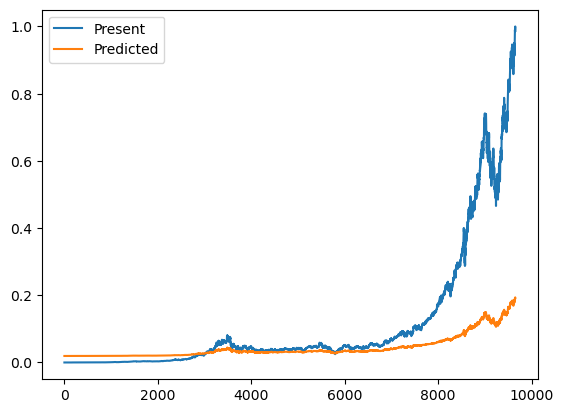

In [95]:
plt.plot(np.concatenate((train, test)), label="Present")
plt.plot(np.concatenate((train_pred, test_pred)), label="Predicted")
plt.legend()
plt.show()

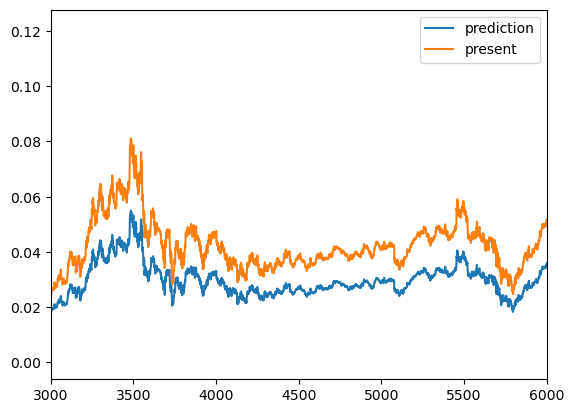

In [88]:
plt.plot(train_pred, label = "prediction")
plt.plot(train, label = "present")
plt.xlim(3000,6000)
plt.legend()
plt.show()


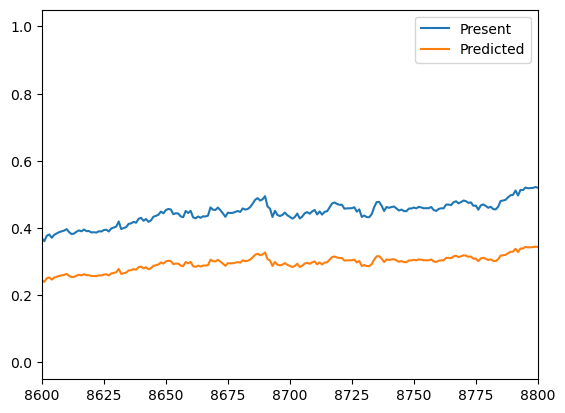

In [90]:
# Plot prediction

start = 8600
width = 200
plt.plot(np.concatenate((train, test)), label="Present")
plt.plot(np.concatenate((train_pred, test_pred)), label="Predicted")
plt.legend()
plt.xlim(start,start+width)
plt.show()

242/242 [==============================] - 0s 288us/step
0
242/242 [==============================] - 0s 267us/step
1
242/242 [==============================] - 0s 271us/step
2
242/242 [==============================] - 0s 268us/step
3
242/242 [==============================] - 0s 285us/step
4
242/242 [==============================] - 0s 269us/step
5
242/242 [==============================] - 0s 257us/step
6
242/242 [==============================] - 0s 268us/step
7
242/242 [==============================] - 0s 257us/step
8
242/242 [==============================] - 0s 257us/step
9
242/242 [==============================] - 0s 258us/step
10
242/242 [==============================] - 0s 259us/step
11
242/242 [==============================] - 0s 522us/step
12
242/242 [==============================] - 0s 287us/step
13
242/242 [==============================] - 0s 259us/step
14
242/242 [==============================] - 0s 261us/step
15
242/242 [==============================] - 0s 254u

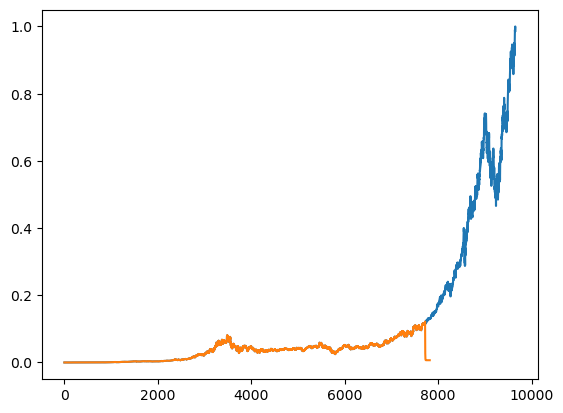

In [91]:
# Forecast
X = train
for i in range(100):
    prediction = nn_model.predict(X)
    X = np.append(X, prediction[-1][0])
    X = X.reshape(len(X), 1)
    print(i)

# Plot Forcast
plt.plot(np.concatenate((train, test)))
plt.plot(X)
plt.show()